# Harjoitus 1
## Tehtävä 1

Tehdään datasta pandas-taulukko. Ensin määritellään itse data, jonka jälkeen nimetään sarakkeet. Näistä luodaan lopuksi haluttu pandas-taulukko.

In [1]:
body = [
    [505, 292, 302, 362],
    [815, 395, 367, 346],
    [295, 384, 340, 313],
    [605, 411, 453, 323],
    [405, 331, 354, 292],
    [740, 412, 416, 364],
    [705, 330, 330, 364],
    [630, 426, 432, 329],
    [870, 400, 349, 374],
    [740, 458, 524, 457],
    [700, 351, 336, 306],
    [770, 462, 474, 415],
]

cols = ["qwerty", "horizontal", "diagonal", "random"]

import pandas as pd

df = pd.DataFrame(data=body, columns=cols)
df

,qwerty,horizontal,diagonal,random
0,505,292,302,362
1,815,395,367,346
2,295,384,340,313
3,605,411,453,323
4,405,331,354,292
5,740,412,416,364
6,705,330,330,364
7,630,426,432,329
8,870,400,349,374
9,740,458,524,457


Datassa on nyt 12 riviä ja neljä pyydettyä saraketta. Datan syöttämisen jälkeen se vielä tarkistettiin vertaamalla sitä alkuperäiseen materiaaliin. Tallennetaan datasetti vielä lopuksi.

In [2]:
## kommentoitu, koska vältetään turhaan tallentamasta useampaan kertaan
# df.to_csv("qwerty_data.csv")

## Tehtävä 2

Koska data on tallennettuna SPSS:n omaan formaattiin, joudumme käyttämään erillistä kirjastoa (`pyreadstat`) datan lukemiseen. Luetaan data pandas taulukkoon.

In [3]:
import pyreadstat

df_brands, meta = pyreadstat.read_sav("brands.sav")

# muutetaan sarakkeiden nimet luettavammiksi käyttäen nimien sijaan sarakkeiden labelia. Tulostetaan sarakkeiden nimet.
df_brands.columns = meta.column_labels
for col in df_brands.columns:
    print(col)

Subject id
Age (years)
Gender
Group
Brand experience Amazon
Brand experience Jasmine
Brand experience Apple
Brand experience Boostep
Brand experience Ikea
Task time Amazon (s)
Task time Jasmine (s)
Task time Apple (s)
Task time Boostep (s)
Task time Ikea (s)
Visual appeal Amazon
Visual appeal Jasmine
Visual appeal Apple
Visual appeal Boostep
Visual appeal Ikea
Feeling of control Amazon
Feeling of control Jasmine
Feeling of control Apple
Feeling of control Boostep
Feeling of control Ikea
Feeling of frustration Amazon
Feeling of frustration Jasmine
Feeling of frustration Apple
Feeling of frustration Boostep
Feeling of frustration Ikea
group = 2 (FILTER)


### a) Mitkä viisi verkkokauppaa esiintyvät kokeessa?
Yllä olevaa tulostetta tarkasteltaessa, kokeessa esiintyivät seuraavat viisi verkkokauppaa: Amazon, Jasmine, Apple, Boostep ja Ikea.

### b) Kuinka monta koehenkilöä datasetissä on?
Tässä kokeessa on kyse between-subjects -asetelmasta, jolloin on oletettavissa, että jokainen tarkasteltava muuttuja on listattu osallistujakohtaisesti omalle rivilleen, joten rivien lukumäärä voisi kertoa osallistujien lukumäärän. Tosin, on myös mahdollista, että syystä tai toisesta, tiettyjä osallistujia on tarkkailtu useampaan kertaan. Joten, on turvallisinta laskea uniikit osallistujien tunnisteet (Subject id).

In [4]:
# metodi 'nunique' laskee uniikit taulukon sarakkeen 'Subject id' alkiot. Tätä ennen, alkiot muutetaan kuitenkin
# kokonaisluvuiksi, koska niiden vertaaminen liukulukuina, joina ne on luettuna pandas-taulukkoon, ei ole järkevää.
# Tässä muuttaminen kokonaisluvuksi on turvallista, koska kaikki 'Subject id' alkiot ovat '.0'-päättyisiä, eli
# metodi 'apply(int)' yksinkertaisesti vain pudottaa desimaalit.
n_unique_subjects = df_brands["Subject id"].apply(int).nunique()
n_rows = df_brands.shape[0]
print(f"Unique 'Subject id' entries after casting them to int: {n_unique_subjects}")
print(f"Rows in data: {n_rows}")

Unique 'Subject id' entries after casting them to int: 40
Rows in data: 40


Yllä olevasta tulosteesta huomataan, että __osallistujia (koehenkilöitä) oli kokeessa datan mukaan 40 kappaletta__. Tämä vastaa myös datassa olevien rivien lukumäärää.

### c) Mikä on osallistujien iän a) keskiarvo, b) mediaani, c) keskihajonta ja d) alin ja ylin ikä?
Koska kohdan b) perusteella, datassa ei ole huomioitu yhtäkään osallistujaa kahteen kertaan, voidaan laskea eri keskiarvot suoraan sarakkeiden datasta, eli ei ole huolta että esimerkiksi saman osallistujan ikä huomioitaisiin useampaan kertaan eri keskiarvoja laskettaessa.

In [5]:
age = df_brands["Age (years)"]
age_mean = age.mean()
age_median = age.median()
age_std = age.std()  # standard deviation
age_min = age.min()
age_max = age.max()

print(f"Age mean:\t{age_mean}\nAge median:\t{age_median}\nAge std:\t{age_std}\nAge minimum:\t{age_min}\nAge maximum:\t{age_max}")

Age mean:	26.4
Age median:	22.5
Age std:	8.329127143606284
Age minimum:	19.0
Age maximum:	56.0


Yllä olevan tulosteen perusteella, __osallistujien iän keskiarvo on 26,4 vuotta, mediaani 22,5 vuotta, keskihajonta on 8.33 vuotta, minimi arvo on 19 vuotta ja maksimi aro on 56 vuotta__. 

## Tehtävä 3
### a) Visualisoi dataa pylväsdiagrammin avulla.
Ymmärsin tehtävänannon perusteella, että riittää piirtä kuvaajat, joissa pyydetyt suureet esiintyvät, eli ryhmä, ika ja sukupuoli. Piirretään aluksi ryhmitetty pylväsdiagrammi, jossa pylväät on ryhmitetty osallistujien ryhmän mukaan. Iälle käytetään keskiarvoa ja sukupuolelle (1 tai 2) käytetään mediaania. Virheenä käytetään keskiarvon keskivirhettä molemmille.

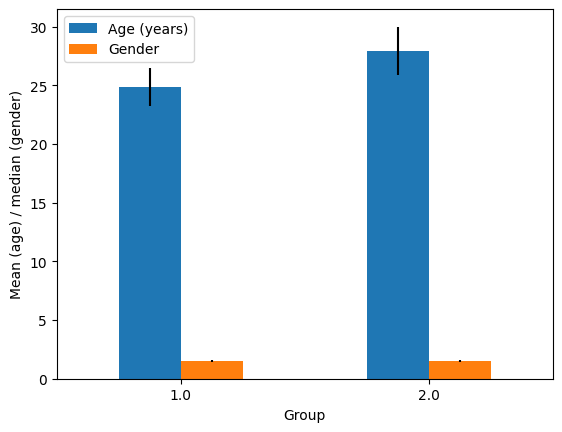

In [6]:
import matplotlib.pyplot as plt

df_brands_view = df_brands.loc[:, ["Group", "Age (years)", "Gender"]]

df_brands_view_pivot = df_brands_view.pivot_table(index="Group", values=["Age (years)", "Gender"], aggfunc={"Gender": "median", "Age (years)": "mean"})  # muotoillaan taulukko uusiksi
df_brands_view_pivot["Age (SEM)"] = df_brands_view.groupby(["Group"])["Age (years)"].sem()  # keskiarvon keskivirhe
df_brands_view_pivot["Gender (SEM)"] = df_brands_view.groupby(["Group"])["Gender"].sem()

df_brands_view_pivot.plot(y=["Age (years)", "Gender"], kind="bar", yerr={"Age (years)": df_brands_view_pivot["Age (SEM)"], "Gender": df_brands_view_pivot["Gender (SEM)"]}, rot=0, ylabel="Mean (age) / median (gender)")
plt.show()

Yllä olevasta pylväsdiagrammista nähdään, että kahden eri ryhmän iän keskiarvoissa on havaittavissa pientä poikkeamaa (suurempi ryhmässä 2), mutta virhe huomioiden, tämä ero ei ole todennäköisesti kovin merkittävä (keskiarvot ovat vähintään keskivirheiden päässä toisistaan). Kummassakin ryhmässä oli tasaisesti kumpaakin sukupuolta, jolloin keskivirhekkin on hyvin pieni.

### b) Visualisoi dataa vielä boxplot-kuvion avulla
Piirretään seuraavaksi boxplot.

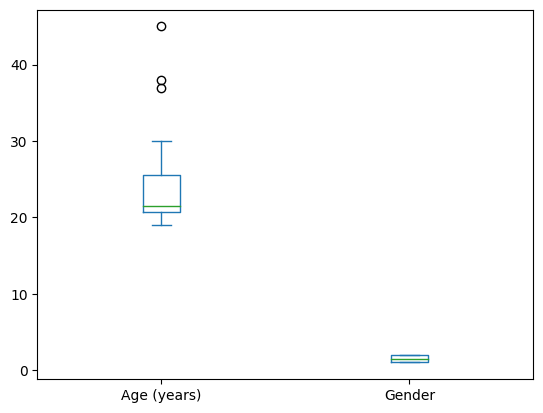

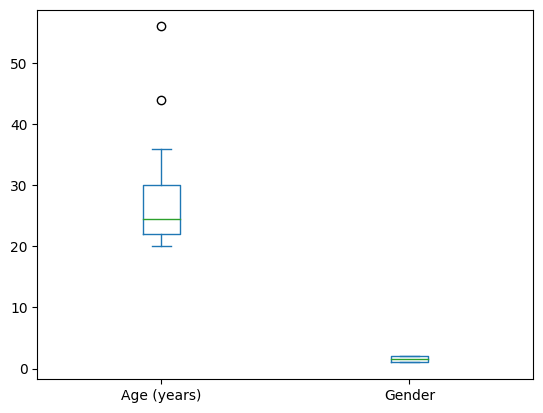

In [7]:
df_brands_view.groupby("Group").plot(y=["Age (years)", "Gender"], kind="box")
plt.show()

Boxploteista nähdään, että kummassakin ryhmässä osallistujien sukupuoli oli jakautunut tasaisesti. Iän suhteen, ryhmässä 1 (ylempi kuva), hajonta on pienempää, kuin ryhmässä 2 (alempi kuva). Tosin, ryhmässä 1 on enemmän poikkeavia havaintoja (jos oletetaan normaalijakauma), kuin ryhmässä 2.

### c) Kumpaa kuviota on mielestäsi helpompi tulkita?

Minusta boxplot on helpompi tulkita, ja se myös kertoo jotakin poikkeavista havainnoista, jotka ovat yleensä niitä mielenkiintoisempia. Keskiarvo ja sen luottamusväli ovat myös paljon visuaalisempia boxplotissa, kuin pylväsdiagrammeissa.

## Tehtävä 4
### a) Kuinka monta vastaajaa kyselyssä on?

In [8]:
df_baro, meta_baro = pyreadstat.read_sav("tiede_baro_2019.sav")

print(f"Rivien lukumäärä: {df_baro.shape[0]}")  # Tulostetaan rivien lukumäärä

Rivien lukumäärä: 2209


Jos oletetaan jokaisen vastaajan olevan omalla rivillään, ja että samaa vastaajaa ei esiinny datassa kahteen kertaan, niin silloin __vataajia on ollut 2209 kappaletta__.

### b) Miten vastaajat jakautuvat sukupuolien mukaan?

In [9]:
gender_mean = df_baro["sukupuoli"].mean()
gender_std = df_baro["sukupuoli"].std()

print(f"Gender mean: {gender_mean} ({gender_std})")

Gender mean: 1.4931381518755718 (0.5000673054370872)


Sukupuolen keskiarvo on 1,49 ja keskihajonta 0,5. Koska mahdolliset arvot ovat 1 tai 2, on keskihaonta järkevä ja keskiarvo kertoo, että __vastaajia on ollut hyvin tasaisesti kumpaakin sukupuolta__.

### c) Vastaajien ikien jakautuminen

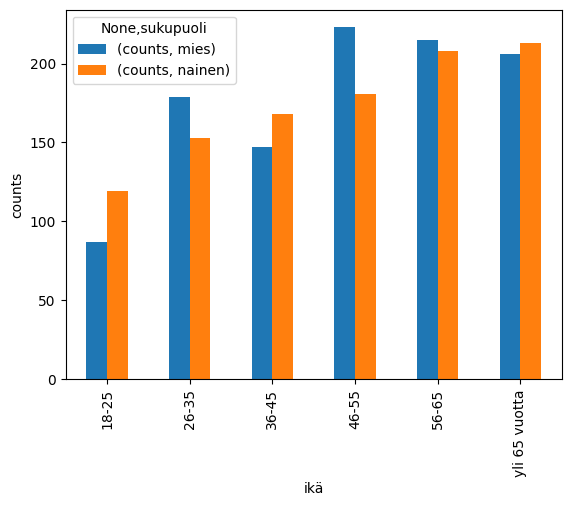

In [10]:
df_baro_view = df_baro.loc[:, ["sukupuoli", "ikä"]].dropna()  # Jos on tyhjää sukupuolen tai iän kohdalla, niin tiputetaan datasta pois. Näin otanta pienenee n. 200
age_labels = meta_baro.value_labels["labels1"]
gender_labels = meta_baro.value_labels["labels0"]

df_baro_view["ikä"] = df_baro_view["ikä"].replace(age_labels)
df_baro_view["sukupuoli"] = df_baro_view["sukupuoli"].replace(gender_labels)

df_baro_view_grouped_counts = df_baro_view.groupby(["ikä", "sukupuoli"]).value_counts().to_frame(name="counts")
df_baro_view_grouped_pivot = df_baro_view_grouped_counts
df_baro_view_grouped_pivot.unstack().plot(kind="bar", ylabel="counts")
plt.show()

Yllä olevan pylväsdiagrammin perusteella, kolme viimeistä ikäluokkaa ovat hieman edustetumpia, kuin kolme ensimmäistä ikäluokkaa. Erityisesti ikäluokka 18-25 vaikuttaa olevan aliedustettu muihin luokiin verrattuna. Ikäluokkien sisällä sukupuoli vaikuttaa olevan tasaisimmin jakautunut kahdessa viimeisessä ikäluokassa. Ikäluokissa 26-35 ja 46-55, miehiä näyttäisi olevan enemmän kuin naisia, kun taas ikäluokissa 18-25 ja 36-45 naisia on enemmän. Tämä havainto on ristiriidassa b-kohdan havainnon kanssa, kun kaikkia vastaajia tarkasteltiin yhdessä. Ehkä kuitenkin merkittävin huomio on se, että kyselyssä saattaa olla yliedustettuna keski-ikäisten ja vanhusten mielipide, joten kyselyn tuloksia on tarkasteltava kriittisesti tämä huomioiden---tuloksia ei voi välttämättä yleistää esittämään koko kansaa. Sukupuolta "Muu" ei esiintynyt kyselyssä.